<a href="https://colab.research.google.com/github/keirabasma/Formation-IA/blob/main/Workshop1_BELLILI_Bouchra_PART2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas numpy matplotlib seaborn plotly -q

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Set display options
pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Load the cars dataset (assuming you've uploaded cars.csv to Colab)
from google.colab import files
uploaded = files.upload()

# Read the CSV file
import io
df = pd.read_csv(io.BytesIO(uploaded['cars.csv']))

# Display basic information
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
display(df.head())
print("\nDataset Info:")
df.info()

Saving cars.csv to cars.csv
Dataset Shape: (15411, 14)

First 5 rows:


,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,price
0,0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         15411 non-null  int64  
 1   car_name           15411 non-null  object 
 2   brand              15411 non-null  object 
 3   model              15411 non-null  object 
 4   vehicle_age        15411 non-null  int64  
 5   km_driven          15411 non-null  int64  
 6   seller_type        15411 non-null  object 
 7   fuel_type          15411 non-null  object 
 8   transmission_type  15411 non-null  object 
 9   mileage            15411 non-null  float64
 10  engine             15411 non-null  int64  
 11  max_power          15411 non-null  float64
 12  seats              15411 non-null  int64  
 13  price              15411 non-null  int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 1.6+ MB


In [2]:
# Check for missing values
print("Missing Values:")
print(df.isnull().sum())

# Drop the unnamed index column if exists
if 'Unnamed: 0' in df.columns:
    df = df.drop('Unnamed: 0', axis=1)

# Convert price to numeric (remove commas if any)
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Create age categories
df['age_category'] = pd.cut(df['vehicle_age'],
                            bins=[0, 3, 6, 10, 20, 50],
                            labels=['New (0-3)', 'Young (4-6)',
                                   'Mid (7-10)', 'Old (11-20)',
                                   'Very Old (20+)'])

# Create price segments
df['price_segment'] = pd.cut(df['price'],
                            bins=[0, 300000, 600000, 1000000, 5000000, 20000000],
                            labels=['Budget', 'Mid-Range', 'Premium',
                                   'Luxury', 'Super Luxury'])

print("\nBasic Statistics:")
print(df.describe())

Missing Values:
Unnamed: 0           0
car_name             0
brand                0
model                0
vehicle_age          0
km_driven            0
seller_type          0
fuel_type            0
transmission_type    0
mileage              0
engine               0
max_power            0
seats                0
price                0
dtype: int64

Basic Statistics:
        vehicle_age     km_driven       mileage        engine     max_power  \
count  15411.000000  1.541100e+04  15411.000000  15411.000000  15411.000000   
mean       6.036338  5.561648e+04     19.701151   1486.057751    100.588254   
std        3.013291  5.161855e+04      4.171265    521.106696     42.972979   
min        0.000000  1.000000e+02      4.000000    793.000000     38.400000   
25%        4.000000  3.000000e+04     17.000000   1197.000000     74.000000   
50%        6.000000  5.000000e+04     19.670000   1248.000000     88.500000   
75%        8.000000  7.000000e+04     22.700000   1582.000000    117.300000  

/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 8377 (\N{INDIAN RUPEE SIGN}) missing from font(s) Liberation Sans.
  fig.canvas.draw()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8377 (\N{INDIAN RUPEE SIGN}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


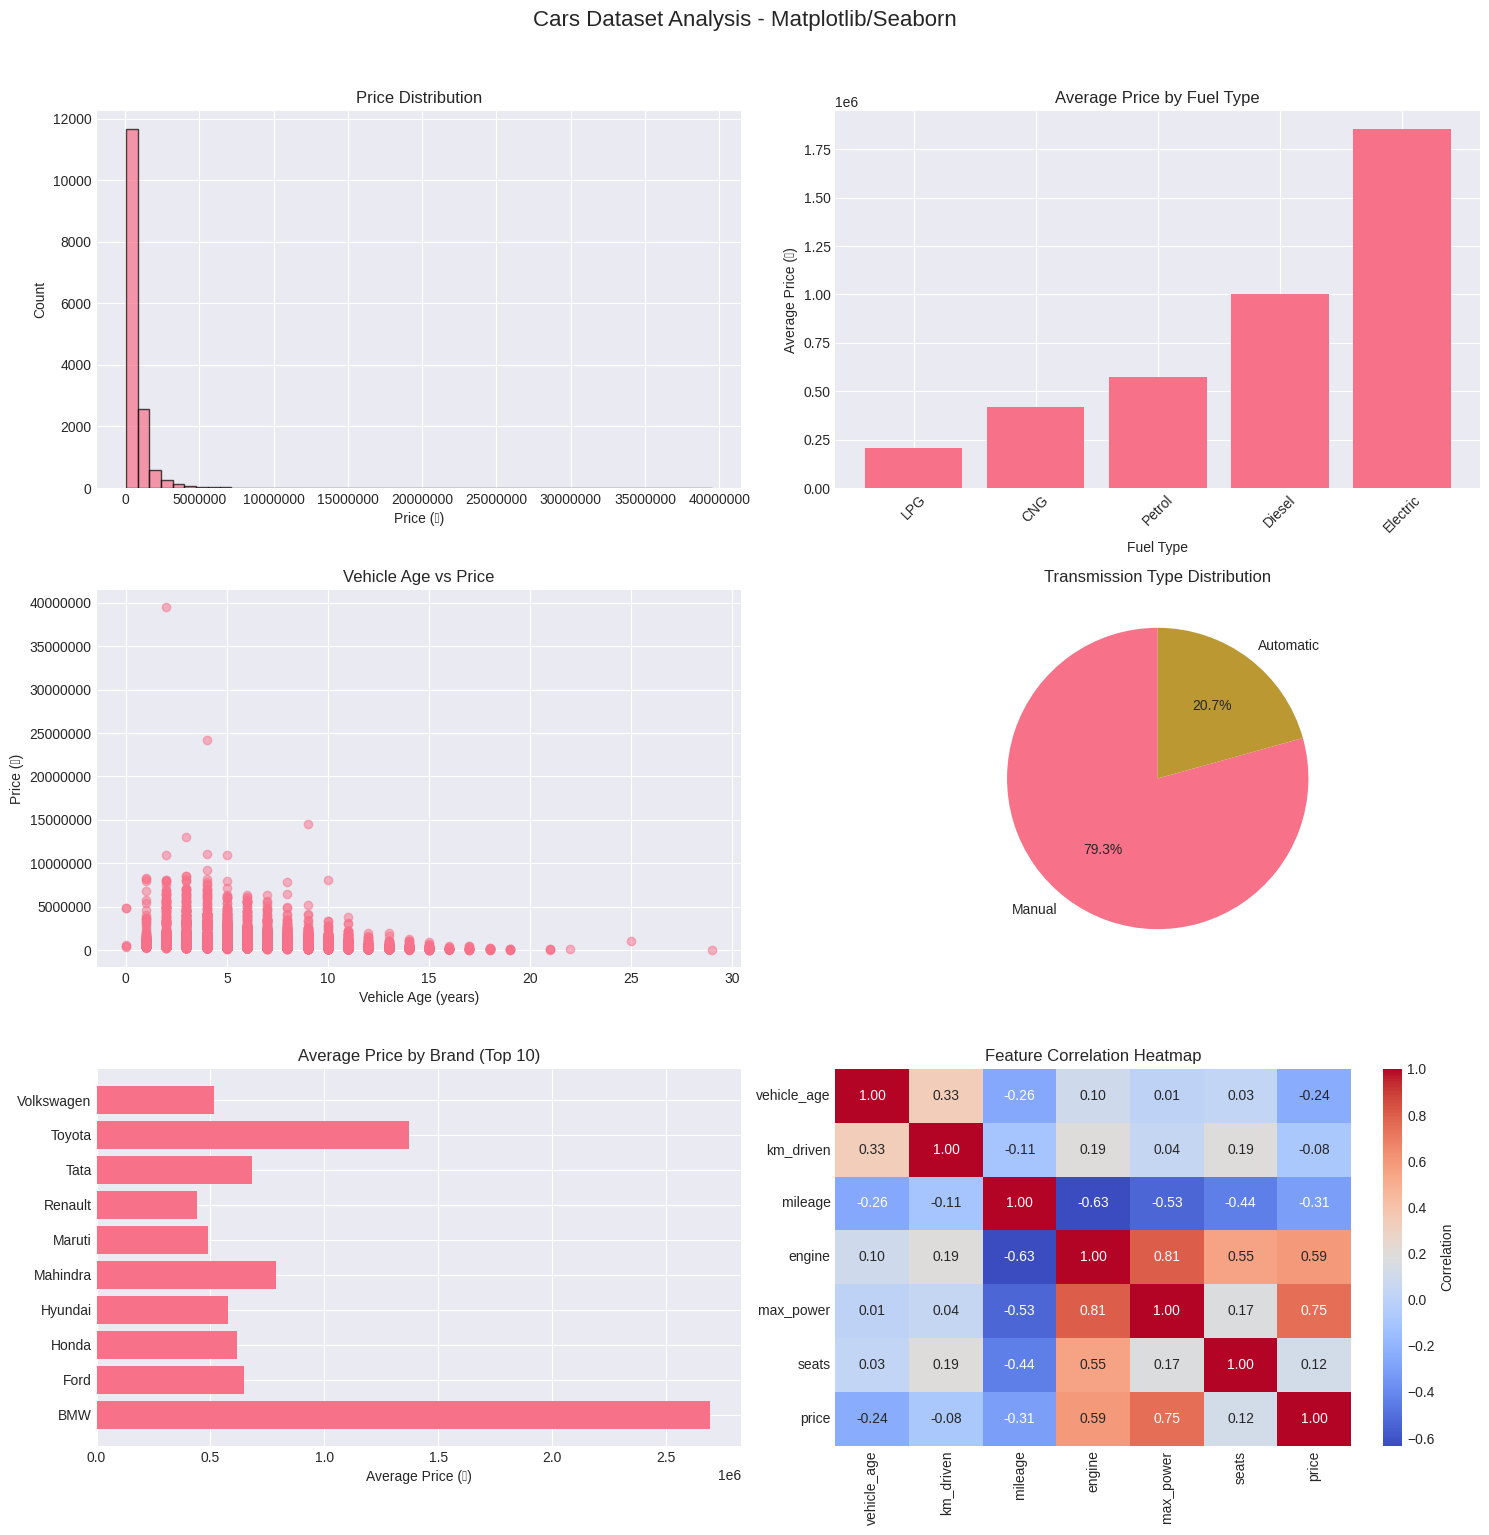

/tmp/ipython-input-237739286.py:58: UserWarning: Glyph 8377 (\N{INDIAN RUPEE SIGN}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8377 (\N{INDIAN RUPEE SIGN}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


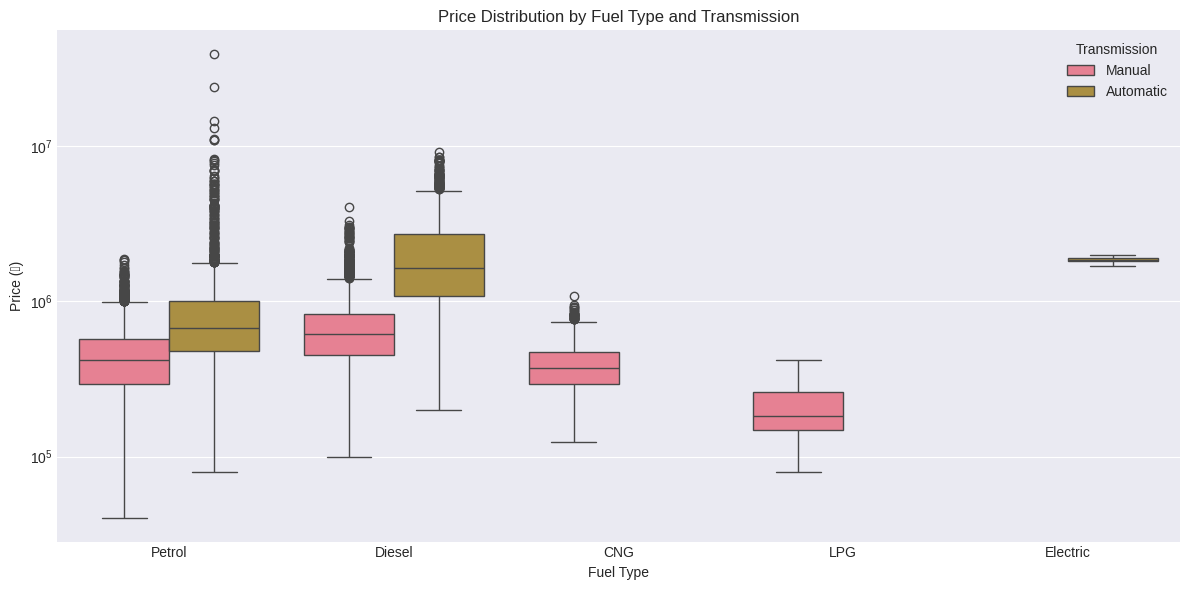

In [3]:
# Create a figure with multiple subplots
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
fig.suptitle('Cars Dataset Analysis - Matplotlib/Seaborn', fontsize=16, y=1.02)

# 1. Price Distribution
axes[0, 0].hist(df['price'], bins=50, edgecolor='black', alpha=0.7)
axes[0, 0].set_xlabel('Price (₹)')
axes[0, 0].set_ylabel('Count')
axes[0, 0].set_title('Price Distribution')
axes[0, 0].ticklabel_format(style='plain', axis='x')

# 2. Price by Fuel Type
fuel_price = df.groupby('fuel_type')['price'].mean().sort_values()
axes[0, 1].bar(fuel_price.index, fuel_price.values)
axes[0, 1].set_xlabel('Fuel Type')
axes[0, 1].set_ylabel('Average Price (₹)')
axes[0, 1].set_title('Average Price by Fuel Type')
axes[0, 1].tick_params(axis='x', rotation=45)

# 3. Vehicle Age vs Price
axes[1, 0].scatter(df['vehicle_age'], df['price'], alpha=0.5)
axes[1, 0].set_xlabel('Vehicle Age (years)')
axes[1, 0].set_ylabel('Price (₹)')
axes[1, 0].set_title('Vehicle Age vs Price')
axes[1, 0].ticklabel_format(style='plain', axis='y')

# 4. Transmission Type Distribution
transmission_counts = df['transmission_type'].value_counts()
axes[1, 1].pie(transmission_counts.values, labels=transmission_counts.index,
               autopct='%1.1f%%', startangle=90)
axes[1, 1].set_title('Transmission Type Distribution')

# 5. Price by Brand (Top 10)
top_brands = df['brand'].value_counts().head(10).index
brand_price = df[df['brand'].isin(top_brands)].groupby('brand')['price'].mean()
axes[2, 0].barh(brand_price.index, brand_price.values)
axes[2, 0].set_xlabel('Average Price (₹)')
axes[2, 0].set_title('Average Price by Brand (Top 10)')

# 6. Heatmap of Correlations
corr_matrix = df[['vehicle_age', 'km_driven', 'mileage', 'engine',
                  'max_power', 'seats', 'price']].corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            ax=axes[2, 1], cbar_kws={'label': 'Correlation'})
axes[2, 1].set_title('Feature Correlation Heatmap')

plt.tight_layout()
plt.show()

# Additional Seaborn visualization
plt.figure(figsize=(12, 6))
sns.boxplot(x='fuel_type', y='price', data=df, hue='transmission_type')
plt.title('Price Distribution by Fuel Type and Transmission')
plt.xlabel('Fuel Type')
plt.ylabel('Price (₹)')
plt.yscale('log')
plt.legend(title='Transmission')
plt.tight_layout()
plt.show()

In [4]:
# Create interactive Plotly visualizations

# 1. Interactive Scatter Plot
fig1 = px.scatter(df, x='vehicle_age', y='price',
                 color='fuel_type', size='engine',
                 hover_data=['car_name', 'brand', 'km_driven', 'mileage'],
                 title='Interactive: Vehicle Age vs Price',
                 labels={'vehicle_age': 'Vehicle Age (years)',
                        'price': 'Price (₹)'})
fig1.update_layout(template='plotly_white')
fig1.show()

# 2. 3D Scatter Plot
fig2 = px.scatter_3d(df, x='vehicle_age', y='km_driven', z='price',
                    color='fuel_type', symbol='transmission_type',
                    hover_data=['car_name', 'brand', 'mileage'],
                    title='3D Visualization: Age, Kilometers, and Price',
                    labels={'vehicle_age': 'Vehicle Age',
                           'km_driven': 'Kilometers Driven',
                           'price': 'Price (₹)'})
fig2.update_layout(margin=dict(l=0, r=0, b=0, t=40))
fig2.show()

# 3. Sunburst Chart (Hierarchical)
fig3 = px.sunburst(df, path=['price_segment', 'fuel_type', 'transmission_type'],
                  values='price', color='price',
                  title='Car Distribution: Price Segment > Fuel Type > Transmission',
                  color_continuous_scale='RdBu')
fig3.update_layout(margin=dict(t=40, l=0, r=0, b=0))
fig3.show()

# 4. Interactive Histogram with Filters
fig4 = px.histogram(df, x='price', nbins=50,
                   color='fuel_type', facet_col='transmission_type',
                   title='Price Distribution by Fuel Type and Transmission',
                   labels={'price': 'Price (₹)', 'count': 'Number of Cars'},
                   hover_data=df.columns)
fig4.update_layout(barmode='overlay')
fig4.update_traces(opacity=0.75)
fig4.show()

# 5. Parallel Coordinates Plot (for multi-dimensional analysis)
fig5 = px.parallel_categories(df,
                             dimensions=['fuel_type', 'transmission_type', 'seller_type', 'price_segment'],
                             color='price', color_continuous_scale=px.colors.sequential.Inferno,
                             title='Parallel Categories: Car Attributes Analysis')
fig5.show()

ValueError: ('None entries cannot have not-None children', price_segment              nan
fuel_type               Petrol
transmission_type    Automatic
Name: 3799, dtype: object)

In [5]:
# Advanced analysis using pandas

# 1. Price trend by vehicle age
age_price_trend = df.groupby('vehicle_age')['price'].agg(['mean', 'median', 'count'])
age_price_trend = age_price_trend[age_price_trend['count'] > 10]

# 2. Most valuable brands (average price)
brand_value = df.groupby('brand').agg({
    'price': ['mean', 'median', 'count'],
    'vehicle_age': 'mean',
    'mileage': 'mean'
}).round(2)
brand_value.columns = ['avg_price', 'median_price', 'count', 'avg_age', 'avg_mileage']
brand_value = brand_value.sort_values('avg_price', ascending=False)

print("Top 10 Most Valuable Brands:")
display(brand_value.head(10))

print("\nPrice Trend by Vehicle Age:")
display(age_price_trend.head(10))

# 3. Correlation analysis
print("\nTop Correlations with Price:")
price_corr = df.select_dtypes(include=[np.number]).corr()['price'].sort_values(ascending=False)
display(price_corr.head(10))

Top 10 Most Valuable Brands:


,avg_price,median_price,count,avg_age,avg_mileage
brand,,,,,
Ferrari,39500000.00,39500000.0,1,2.00,4.00
Rolls-Royce,24200000.00,24200000.0,1,4.00,10.20
Bentley,9266666.67,8100000.0,3,9.33,8.03
Maserati,6100000.00,6100000.0,2,5.00,19.82
Porsche,5161190.48,5000000.0,21,6.90,13.52
Lexus,5146500.00,4600000.0,10,3.60,20.85
Mercedes-AMG,5100000.00,5100000.0,1,4.00,11.90
Land Rover,3823901.96,3400000.0,51,6.08,13.03
Volvo,3729700.00,3750000.0,20,5.40,14.86



Price Trend by Vehicle Age:


,mean,median,count
vehicle_age,,,
1,1.096977e+06,750000.0,221
2,1.143023e+06,820000.0,1145
3,9.770950e+05,745000.0,1926
4,9.509427e+05,695500.0,2252
5,8.188928e+05,600000.0,2117
6,7.285146e+05,550000.0,1924
7,6.990758e+05,500000.0,1438
8,6.259454e+05,450000.0,1282
9,5.924664e+05,400000.0,1027



Top Correlations with Price:


,price
price,1.000000
max_power,0.750236
engine,0.585844
seats,0.115033
km_driven,-0.080030
vehicle_age,-0.241851
mileage,-0.305549


In [6]:
# Create a comprehensive dashboard
fig_dashboard = make_subplots(
    rows=3, cols=3,
    subplot_titles=('Price Distribution', 'Age vs Price', 'Fuel Type Distribution',
                   'Top Brands by Count', 'Mileage Distribution', 'Engine vs Price',
                   'Transmission Distribution', 'Price by Seller Type', 'Seats Distribution'),
    specs=[[{'type': 'histogram'}, {'type': 'scatter'}, {'type': 'pie'}],
           [{'type': 'bar'}, {'type': 'box'}, {'type': 'scatter'}],
           [{'type': 'pie'}, {'type': 'bar'}, {'type': 'histogram'}]]
)

# Add traces to dashboard
fig_dashboard.add_trace(go.Histogram(x=df['price'], name='Price'), row=1, col=1)
fig_dashboard.add_trace(go.Scatter(x=df['vehicle_age'], y=df['price'],
                                  mode='markers', name='Age-Price'), row=1, col=2)
fig_dashboard.add_trace(go.Pie(labels=df['fuel_type'].value_counts().index,
                              values=df['fuel_type'].value_counts().values), row=1, col=3)

top_brands = df['brand'].value_counts().head(10)
fig_dashboard.add_trace(go.Bar(x=top_brands.index, y=top_brands.values), row=2, col=1)
fig_dashboard.add_trace(go.Box(x=df['fuel_type'], y=df['mileage']), row=2, col=2)
fig_dashboard.add_trace(go.Scatter(x=df['engine'], y=df['price'],
                                  mode='markers', name='Engine-Price'), row=2, col=3)

fig_dashboard.add_trace(go.Pie(labels=df['transmission_type'].value_counts().index,
                              values=df['transmission_type'].value_counts().values), row=3, col=1)

seller_price = df.groupby('seller_type')['price'].mean()
fig_dashboard.add_trace(go.Bar(x=seller_price.index, y=seller_price.values), row=3, col=2)

fig_dashboard.add_trace(go.Histogram(x=df['seats'], name='Seats'), row=3, col=3)

fig_dashboard.update_layout(height=900, showlegend=False,
                           title_text="Comprehensive Cars Dataset Dashboard")
fig_dashboard.show()